## <div align="center"> PRESENTASI LAPORAN AKHIR MACHINE LEARNING </div>
## <div align="center"> Judul: Klasifikasi Saham IDX kepada Listing Board berdasarkan 5 Faktor Utama </div>
### <div align="center"> oleh Kelompok 5 </div>
### <div align="center"> Semester Genap 2022/2023 </div>

### Melakukan import library yang digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.tree import export_graphviz
from mpl_toolkits.mplot3d import Axes3D

import os
os.environ["PATH"] += os.pathsep + "/usr/local/bin"

# EDA

### Menampilkan Data

In [2]:
board = pd.read_csv('board.csv')
board.head()

,Code,Name,ListingDate,Shares,ListingBoard,MarketCap,DailyLastUpdated,Operational Lifetime,Avg. Value,Avg. Frequency
0,AALI,Astra Agro Lestari Tbk.,1997-12-09,1.924688e+09,Utama,1.539751e+13,2023-01-06,9159.0,2.075530e+10,1690.068894
1,ABBA,Mahaka Media Tbk.,2002-04-03,3.935893e+09,Pengembangan,5.588968e+11,2023-01-06,7583.0,7.467397e+09,2493.162839
2,ABDA,Asuransi Bina Dana Arta Tbk.,1989-07-06,6.208067e+08,Pengembangan,4.159405e+12,2023-01-06,12237.0,2.695621e+06,0.578288
3,ABMM,ABM Investama Tbk.,2011-12-06,2.753165e+09,Utama,8.397153e+12,2023-01-06,4049.0,6.810038e+07,32.565762
4,ACES,Ace Hardware Indonesia Tbk.,2007-11-06,1.715000e+10,Utama,8.403500e+12,2023-01-06,5540.0,3.303881e+10,4613.549061


### Menampilkan informasi kolom

In [3]:
board.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733 entries, 0 to 732
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Code                  733 non-null    object 
 1   Name                  733 non-null    object 
 2   ListingDate           733 non-null    object 
 3   Shares                733 non-null    float64
 4   ListingBoard          733 non-null    object 
 5   MarketCap             733 non-null    float64
 6   DailyLastUpdated      733 non-null    object 
 7   Operational Lifetime  733 non-null    float64
 8   Avg. Value            733 non-null    float64
 9   Avg. Frequency        733 non-null    float64
dtypes: float64(5), object(5)
memory usage: 57.4+ KB


### Menampilkan statistika dasar

In [4]:
board.describe()

,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency
count,7.330000e+02,7.330000e+02,733.000000,7.330000e+02,7.330000e+02
mean,9.489298e+09,1.057837e+13,5644.088677,1.272437e+10,2.321886e+04
std,1.998018e+10,5.324363e+13,4070.283042,4.663522e+10,5.958284e+05
min,3.600000e+06,9.000000e+09,546.000000,0.000000e+00,0.000000e+00
25%,1.200000e+09,3.127500e+11,1733.000000,6.486467e+07,3.459916e+01
50%,3.138983e+09,1.180102e+12,4455.000000,5.048071e+08,2.059500e+02
75%,9.412000e+09,4.387230e+12,9416.000000,5.425330e+09,1.273775e+03
max,3.081068e+11,1.012951e+15,16585.000000,6.043433e+11,1.613250e+07


### Menampilkan visualisasi boxplot

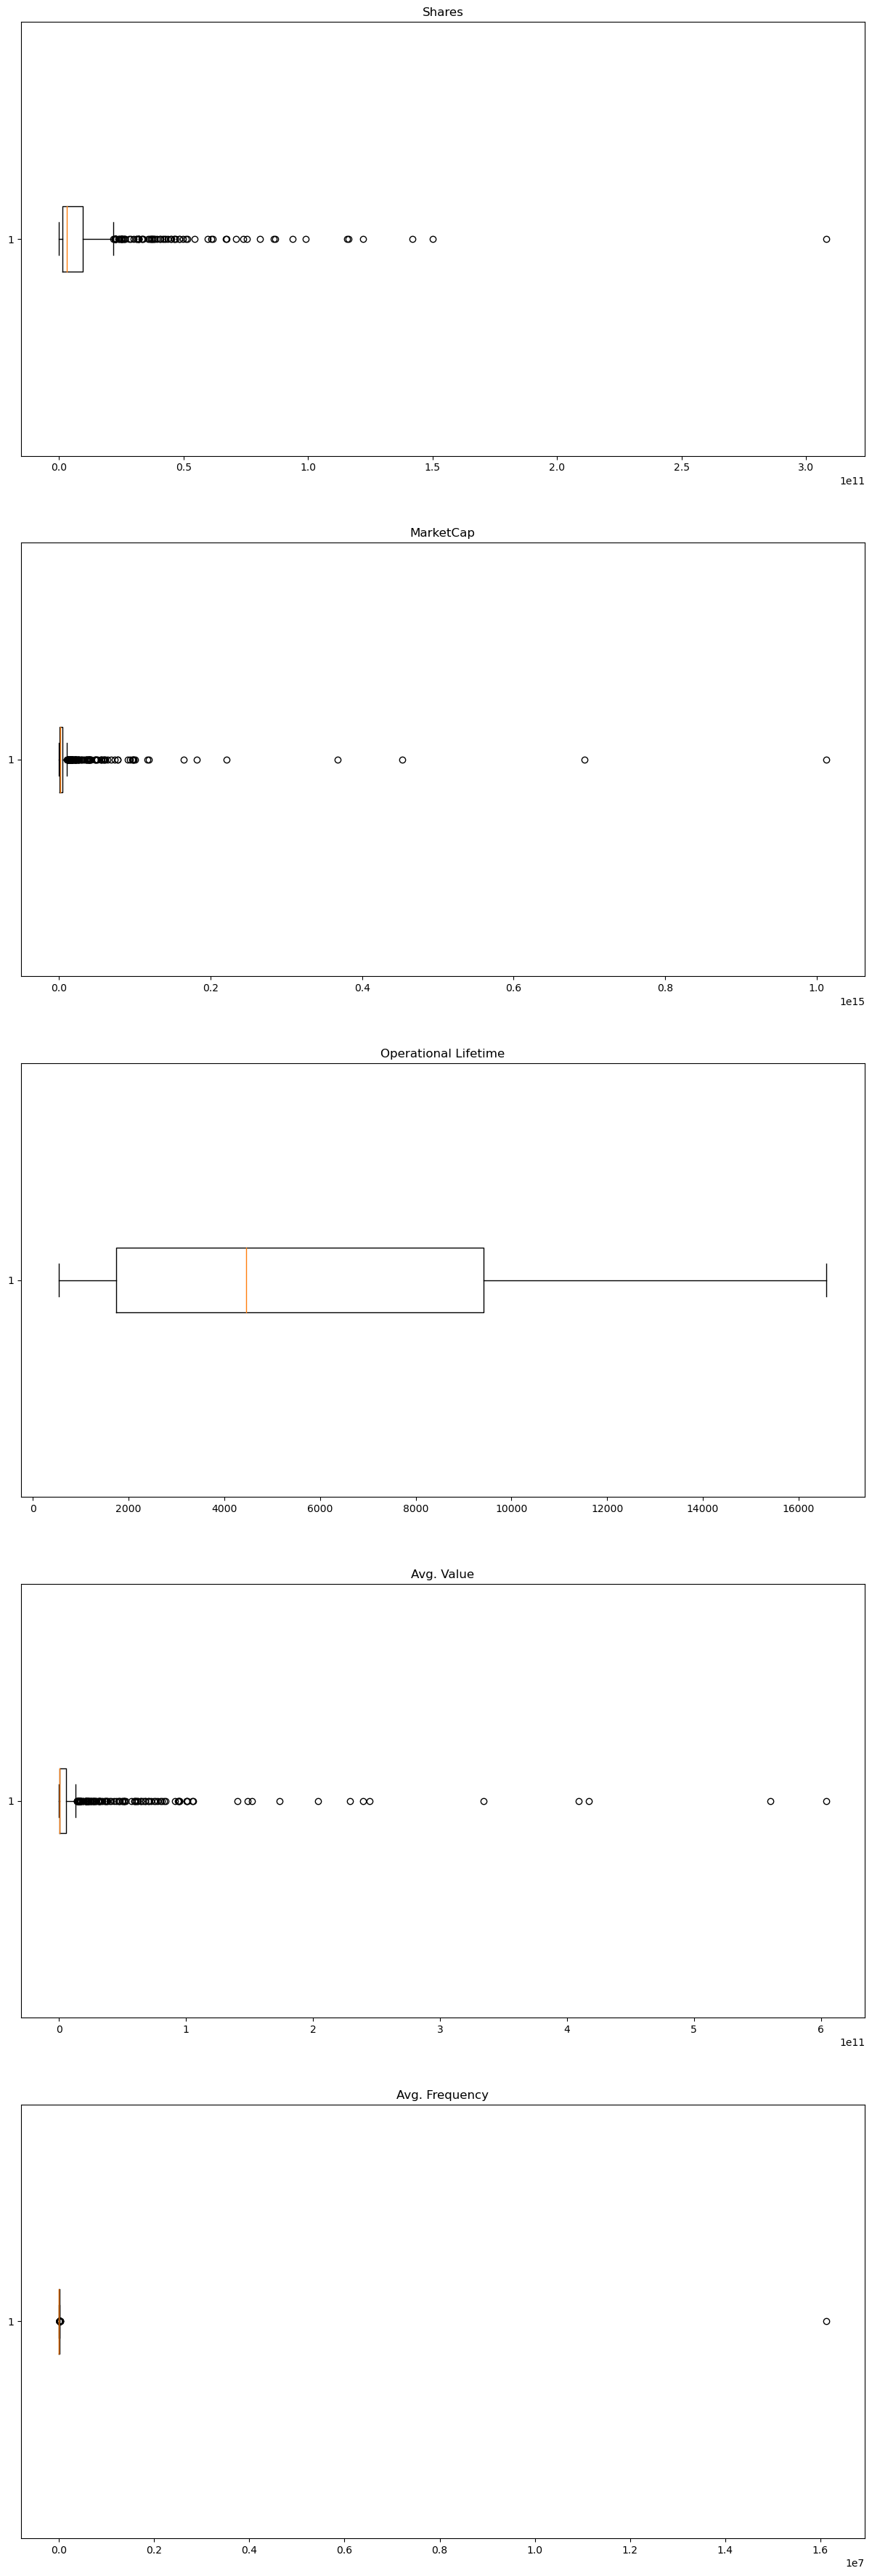

In [5]:
columns = ['Shares', 'MarketCap', 'Operational Lifetime', 'Avg. Value', 'Avg. Frequency']

fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15,45))

for i, col in enumerate(columns):
    axs[i].boxplot(board[col], vert=False)
    axs[i].set_title(col)
    
plt.show()

### Menampilkan visualisasi histogram

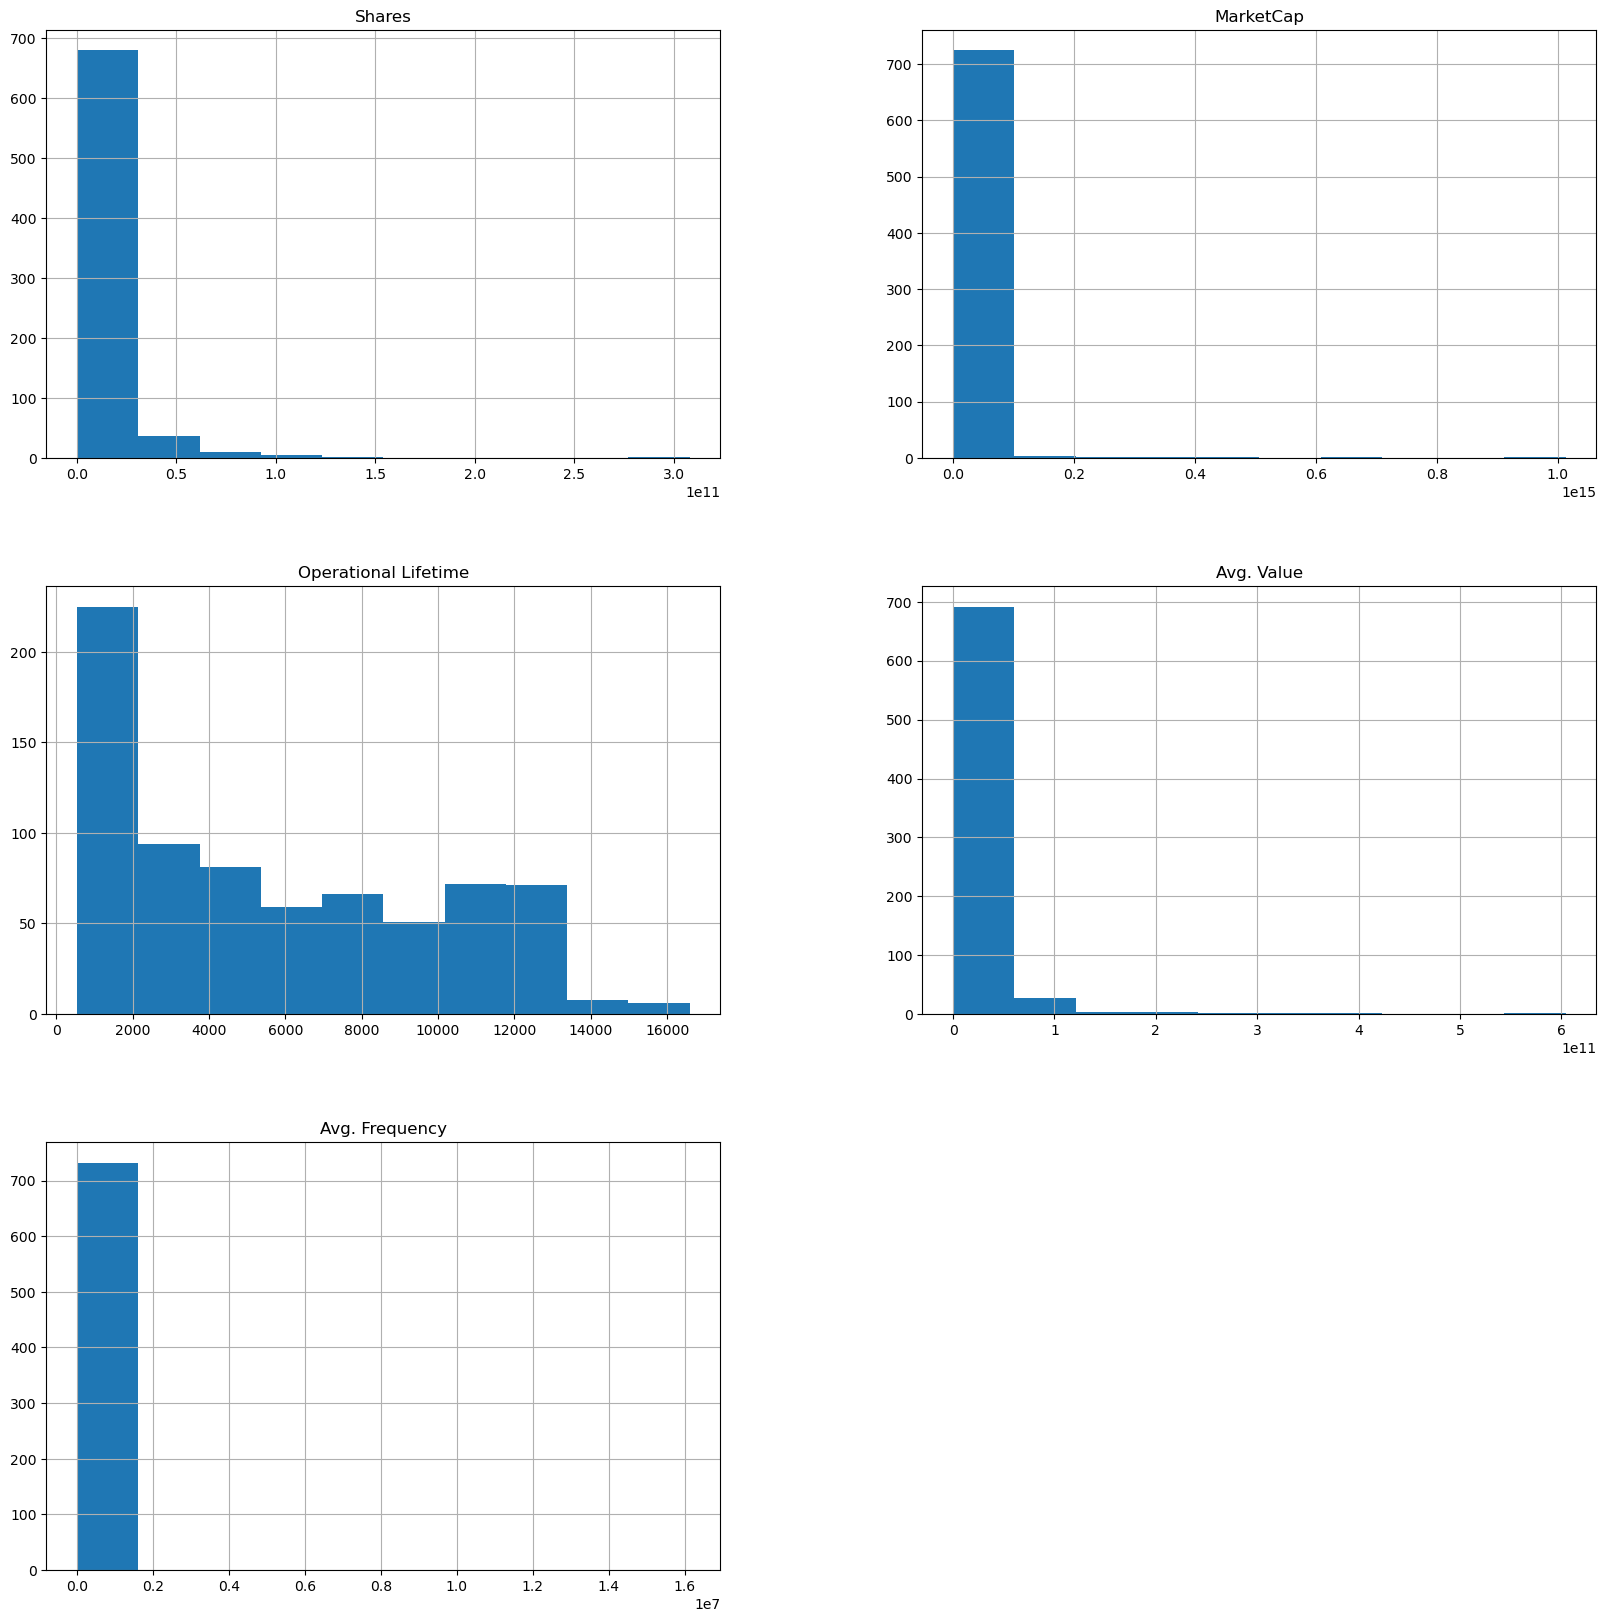

In [6]:
import matplotlib.pyplot as plt

board[columns].hist(bins=10, figsize=(20,20))
plt.show()

### Menampilkan visualisasi countplot

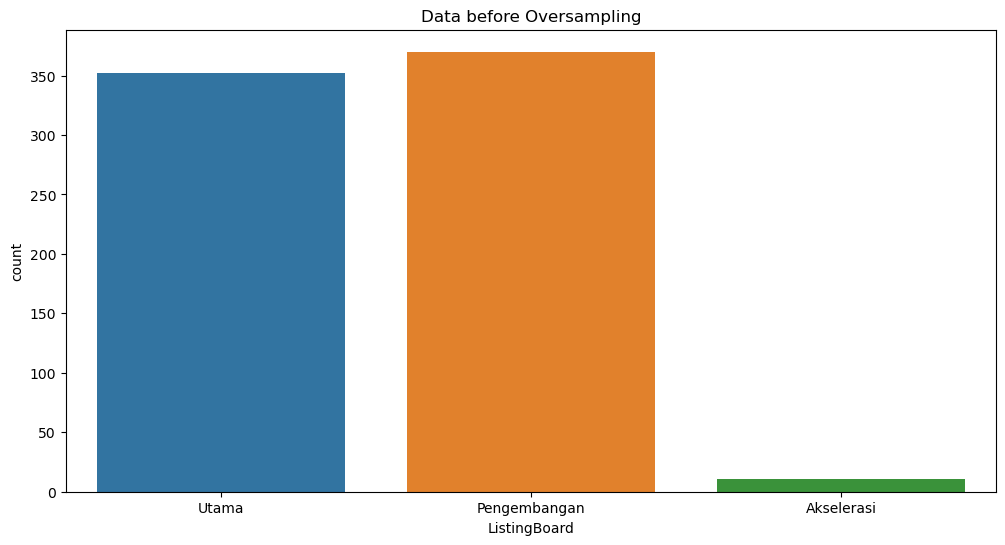

In [7]:
plt.figure(figsize=(12,6))
plt.title('Data before Oversampling')
sns.countplot(x = board['ListingBoard'], data = board)
plt.show()

# Preprocessing

### Melakukan drop column yang tidak digunakan

In [8]:
board.drop(['ListingDate'], axis = 1, inplace = True)
board.drop(['DailyLastUpdated'], axis = 1, inplace = True)
board['Listing Board'] = board['ListingBoard']
board.drop(['ListingBoard'], axis = 1, inplace = True)
board.head()

,Code,Name,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency,Listing Board
0,AALI,Astra Agro Lestari Tbk.,1.924688e+09,1.539751e+13,9159.0,2.075530e+10,1690.068894,Utama
1,ABBA,Mahaka Media Tbk.,3.935893e+09,5.588968e+11,7583.0,7.467397e+09,2493.162839,Pengembangan
2,ABDA,Asuransi Bina Dana Arta Tbk.,6.208067e+08,4.159405e+12,12237.0,2.695621e+06,0.578288,Pengembangan
3,ABMM,ABM Investama Tbk.,2.753165e+09,8.397153e+12,4049.0,6.810038e+07,32.565762,Utama
4,ACES,Ace Hardware Indonesia Tbk.,1.715000e+10,8.403500e+12,5540.0,3.303881e+10,4613.549061,Utama


### Melakukan pemindahan dataset

In [9]:
columns = ['Shares', 'MarketCap', 'Operational Lifetime', 'Avg. Value', 'Avg. Frequency']
data = board.drop(['Code', 'Name'], axis = 1)
data.head()

,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency,Listing Board
0,1.924688e+09,1.539751e+13,9159.0,2.075530e+10,1690.068894,Utama
1,3.935893e+09,5.588968e+11,7583.0,7.467397e+09,2493.162839,Pengembangan
2,6.208067e+08,4.159405e+12,12237.0,2.695621e+06,0.578288,Pengembangan
3,2.753165e+09,8.397153e+12,4049.0,6.810038e+07,32.565762,Utama
4,1.715000e+10,8.403500e+12,5540.0,3.303881e+10,4613.549061,Utama


### Melakukan normalisasi menggunakan MinMaxScaler

In [10]:
minmax = MinMaxScaler()
data[columns] = minmax.fit_transform(data[columns])
data.describe()

,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency
count,733.000000,733.000000,733.000000,733.000000,733.000000
mean,0.030787,0.010434,0.317856,0.021055,0.001439
std,0.064849,0.052563,0.253774,0.077167,0.036933
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003883,0.000300,0.074007,0.000107,0.000002
50%,0.010176,0.001156,0.243718,0.000835,0.000013
75%,0.030537,0.004322,0.553027,0.008977,0.000079
max,1.000000,1.000000,1.000000,1.000000,1.000000


### Melakukan standardization menggunakan StandardScaler

In [11]:
scaler = StandardScaler()
data[columns] = scaler.fit_transform(data[columns])
data.head()

,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency,Listing Board
0,-0.378864,0.090573,0.864144,0.172325,-0.036157,Utama
1,-0.278136,-0.188310,0.476683,-0.112802,-0.034808,Pengembangan
2,-0.444168,-0.120641,1.620873,-0.272977,-0.038995,Pengembangan
3,-0.337371,-0.040995,-0.392154,-0.271574,-0.038941,Utama
4,0.383677,-0.040875,-0.025590,0.435900,-0.031247,Utama


### Melakukan mapping kepada kolom 'Listing Board'

In [12]:
auto_mapping = {label: idx for idx, label in enumerate(np.unique(data['Listing Board']))}
data['Listing Board'] = data['Listing Board'].map(auto_mapping)

data.head() # 0 = Akselerasi, 1 = Pengembangan, 2 = Utama

,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency,Listing Board
0,-0.378864,0.090573,0.864144,0.172325,-0.036157,2
1,-0.278136,-0.188310,0.476683,-0.112802,-0.034808,1
2,-0.444168,-0.120641,1.620873,-0.272977,-0.038995,1
3,-0.337371,-0.040995,-0.392154,-0.271574,-0.038941,2
4,0.383677,-0.040875,-0.025590,0.435900,-0.031247,2


### Melakukan proses removing outliers menggunakan z_score

In [13]:
z_scores = np.abs(stats.zscore(data))

threshold = 3

outlier_indices = np.where(z_scores > threshold)

dataf = data[(z_scores < threshold).all(axis=1)]
dataf

,Shares,MarketCap,Operational Lifetime,Avg. Value,Avg. Frequency,Listing Board
0,-0.378864,0.090573,0.864144,0.172325,-0.036157,2
1,-0.278136,-0.188310,0.476683,-0.112802,-0.034808,1
2,-0.444168,-0.120641,1.620873,-0.272977,-0.038995,1
3,-0.337371,-0.040995,-0.392154,-0.271574,-0.038941,2
4,0.383677,-0.040875,-0.025590,0.435900,-0.031247,2
...,...,...,...,...,...,...
728,-0.385860,-0.124002,0.235258,-0.270879,-0.038985,1
729,-0.349514,-0.173333,1.435010,-0.245464,-0.038326,1
730,0.789356,-0.175086,-0.918521,0.756216,-0.031285,1
731,-0.431678,-0.179107,-1.022270,-0.271547,-0.038934,1


### Deklarasi X dan Y

In [14]:
X = dataf.iloc[:, 0:5]
y = dataf.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melakukan hybrid sampling menggunakan metode SMOTETomek

In [15]:
smote = SMOTETomek(random_state = 42)
X_trainover, y_trainover = smote.fit_resample(X_train, y_train)

### Melakukan visualisasi countplot

Listing Board
0    281
1    225
2    225
Name: count, dtype: int64


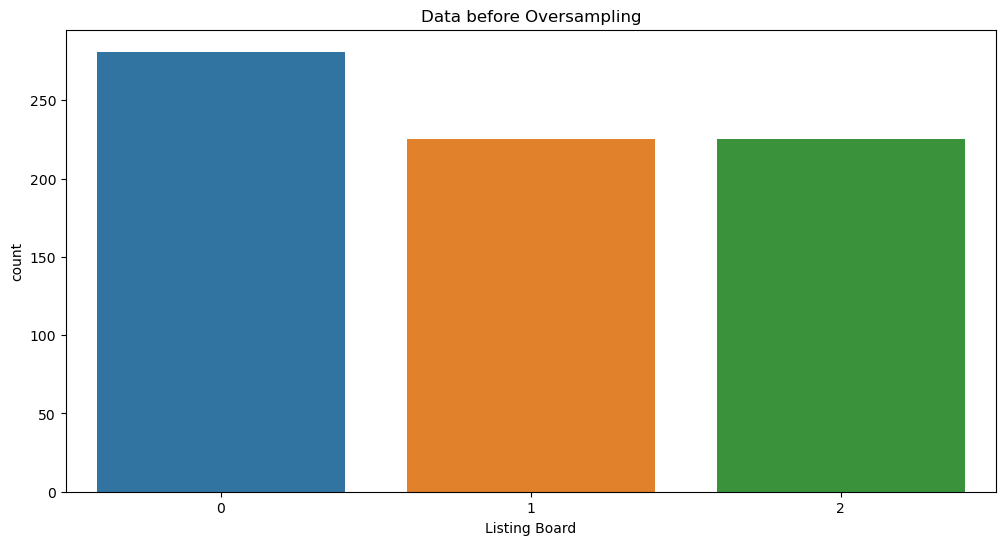

In [16]:
print(y_trainover.value_counts())

plt.figure(figsize=(12,6))
plt.title('Data before Oversampling')
sns.countplot(x = y_trainover, data = board)
plt.show()

# Modeling

## KNN

### Membuat model menggunakan metode tuning hyperparamer GridSearch

In [17]:
knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 8, 9, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean'],
    'leaf_size': [20, 30, 40]
}

knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv = 5)

knn_grid.fit(X_trainover, y_trainover)

print("Best parameters: ", knn_grid.best_params_)
print("Best score: ", knn_grid.best_score_, "\n\n")

tree = knn_grid.best_estimator_
knn.fit(X_trainover, y_trainover)

print("Accuracy on training set: {:.3f}".format(knn.score(X_trainover, y_trainover)))
print("Accurary on test set: {:.3f}".format(knn.score(X_test, y_test)))

Best parameters:  {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best score:  0.8345075016307894 


Accuracy on training set: 0.869
Accurary on test set: 0.734


### Melakukan predict kepada x_test menggunakan model yang sudah dibuat dan ditrain

In [18]:
knn_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.734


## Decision Tree

### Membuat model menggunakan metode tuning hyperparamer GridSearch

In [19]:
tree = DecisionTreeClassifier()


grid = {'max_depth': [10, 11, 12],
        'min_samples_leaf': [8, 9],
        'criterion': ['entropy']}


tree_grid = GridSearchCV(estimator=tree, param_grid = grid, cv = 5)

tree_grid.fit(X_trainover, y_trainover)

print("Best parameters: ", tree_grid.best_params_)
print("Best score: ", tree_grid.best_score_, "\n\n")

tree = tree_grid.best_estimator_

tree.fit(X_trainover, y_trainover)

print("Accuracy on training set: {:.3f}".format(tree.score(X_trainover, y_trainover)))
print("Accurary on test set: {:.3f}".format(tree.score(X_test, y_test)))

Best parameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9}
Best score:  0.8126176497996458 


Accuracy on training set: 0.885
Accurary on test set: 0.762


### Melakukan predict kepada x_test menggunakan model yang sudah dibuat dan ditrain

In [20]:
tree_pred = tree.predict(X_test)

accuracy = accuracy_score(y_test, tree_pred)
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.762


# Evaluation

## KNN

### Melihat classification report model KNN 

In [21]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       0.81      0.72      0.76        85
           2       0.67      0.75      0.71        56

    accuracy                           0.73       143
   macro avg       0.63      0.82      0.68       143
weighted avg       0.75      0.73      0.74       143



### Melihat confusion matrix dari model KNN

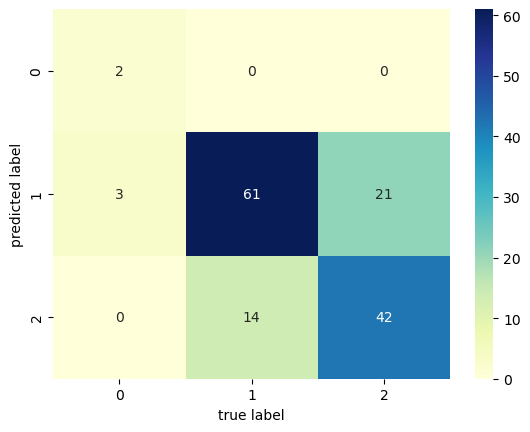

In [22]:
confusion_matrix_tree = confusion_matrix(y_test, knn_pred)
sns.heatmap(confusion_matrix_tree, annot=True, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

## Decision Tree

### Melihat classification report model Decision Tree

In [23]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.80      0.80      0.80        85
           2       0.70      0.70      0.70        56

    accuracy                           0.76       143
   macro avg       0.83      0.83      0.83       143
weighted avg       0.76      0.76      0.76       143



### Melihat confusion matrix dari model KNN

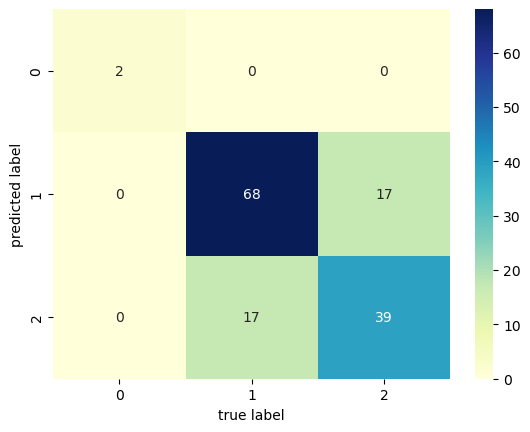

In [24]:
confusion_matrix_tree = confusion_matrix(y_test, tree_pred)
sns.heatmap(confusion_matrix_tree, annot=True, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

### Melakukan export visualisasi model decision tree yang terbuat

In [25]:
export_graphviz(tree,out_file="tree.dot", class_names=['0', '1', '2'],
               feature_names= X.columns, impurity=False, filled=True)

### Membuka file yang diexport diatas

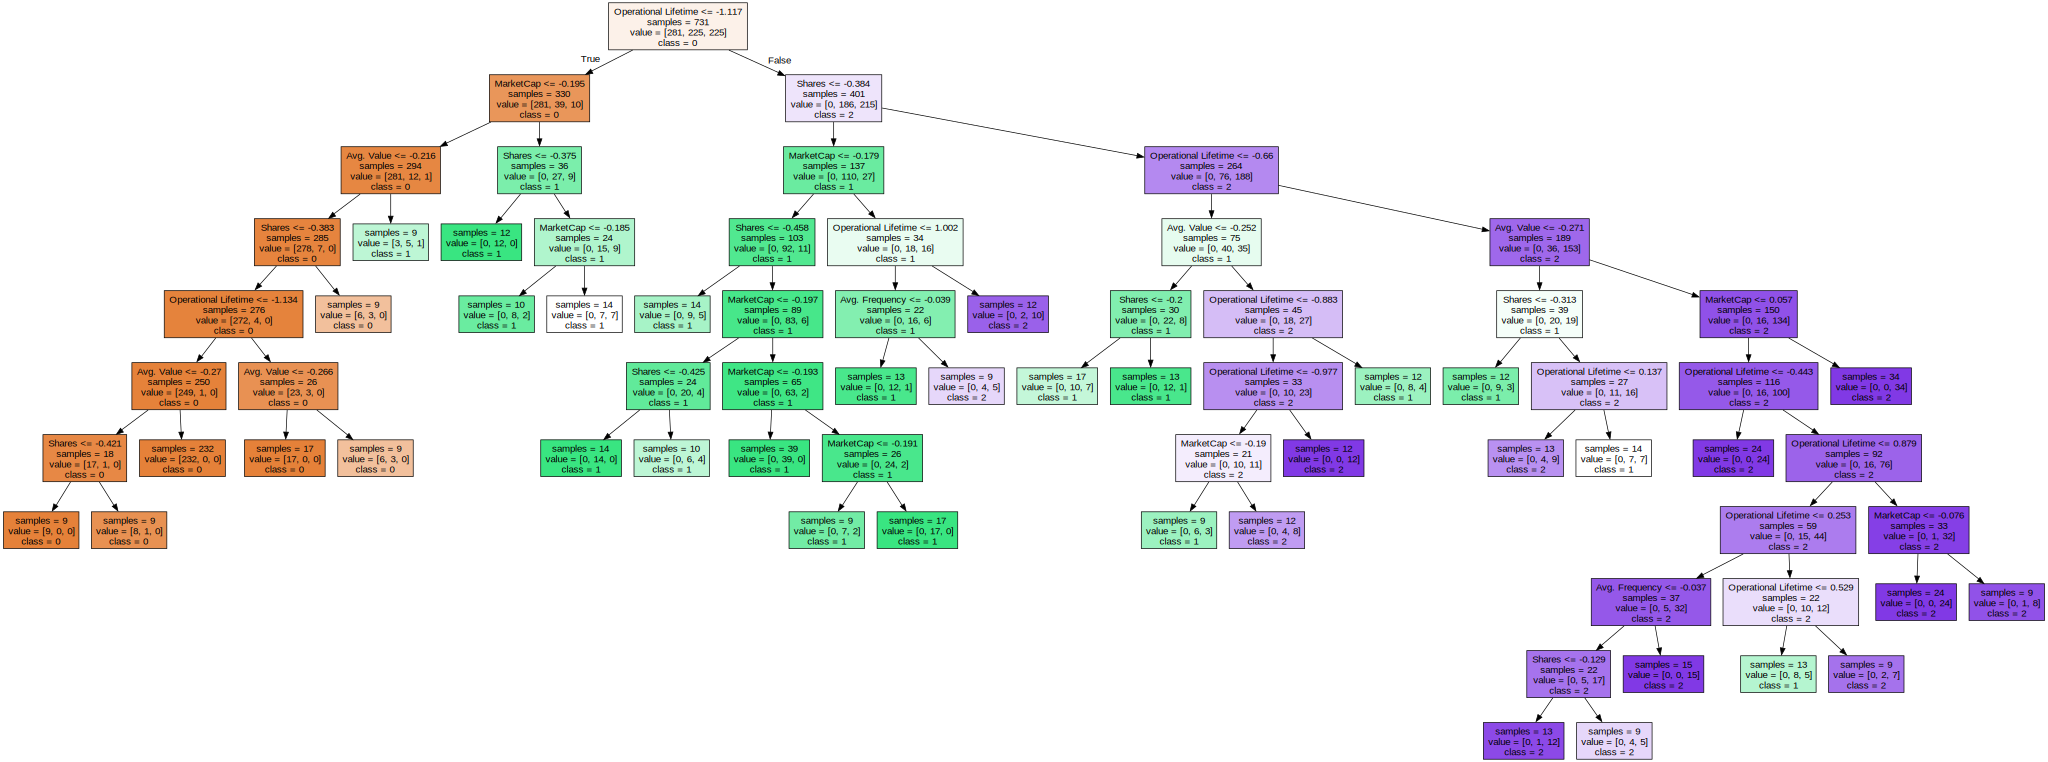

In [26]:
with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

### Melakukan visualisasi untuk melihat feature importance setiap fitur

Feature importances: 
[0.1193116  0.17278959 0.63590585 0.0625273  0.00946566]


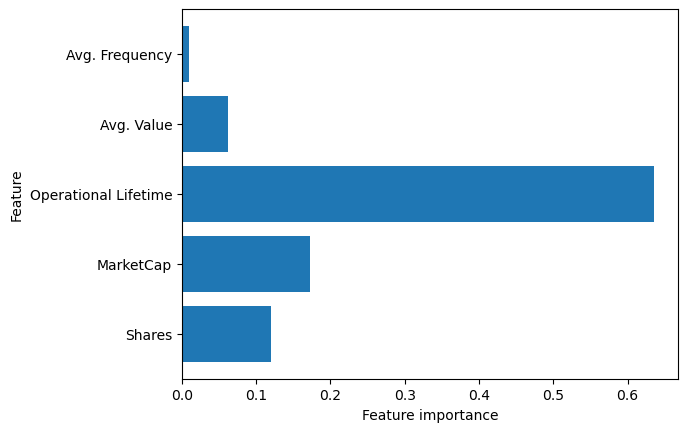

In [27]:
print('Feature importances: \n{}'.format(tree.feature_importances_))

def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
plot_feature_importances(tree)

### Mengubah file .dot yang diexport tadi menjadi .pdf

In [28]:
path = '/Users/arya/Documents/Anaconda/Project ML/tree.dot'

graph = graphviz.Source.from_file(path)
graph.render(view=True)

'/Users/arya/Documents/Anaconda/Project ML/tree.dot.pdf'

# Summary

### Membuat dataframe untuk melihat hasil summary dari kedua model

In [29]:
summary = {'Algorithm': ['KNN', 'Decision Tree'],
        'Accuracy (Training)': [knn.score(X_trainover, y_trainover), tree.score(X_trainover, y_trainover)],
        'Accuracy (Testing)': [knn.score(X_test, y_test), tree.score(X_test, y_test)]}
summary_table = pd.DataFrame(summary)

summary_table

,Algorithm,Accuracy (Training),Accuracy (Testing)
0,KNN,0.868673,0.734266
1,Decision Tree,0.885089,0.762238


# The End :D